In [11]:
print('hello world!')

hello world!


In [10]:
#importing packages 
import numpy as np
import pandas as pd

In [49]:
#reading data set
df = pd.read_csv(r'C:\Users\killi\Downloads\HSA06.20221122T131126.csv')

In [50]:
#inspecting data set
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  588 non-null    object 
 1   Year             588 non-null    int64  
 2   Area             588 non-null    object 
 3   UNIT             588 non-null    object 
 4   VALUE            583 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 23.1+ KB
None


In [51]:
#counting missing values
print(df.isnull().sum())


Statistic Label    0
Year               0
Area               0
UNIT               0
VALUE              5
dtype: int64


In [52]:
#replace missing values and check
print(df.fillna(0).isnull().sum())

Statistic Label    0
Year               0
Area               0
UNIT               0
VALUE              0
dtype: int64


In [53]:
#checking how many rows and columns are in the dataset
df.shape

(588, 5)

In [55]:
#create 2 datasets for new price analysis. One for Dublin and the second for National.
df_Dub_new = df[(df['Statistic Label'].str.contains("New")) &  (df['Area']=="Dublin")].reset_index()
df_Nat_new = df[(df['Statistic Label'].str.contains("New")) &  (df['Area']=="National")].reset_index()

In [56]:
df_Dub_new.head()

,index,Statistic Label,Year,Area,UNIT,VALUE
0,1,New House Prices,1975,Dublin,Euro,13137.0
1,8,New House Prices,1976,Dublin,Euro,15342.0
2,15,New House Prices,1977,Dublin,Euro,19055.0
3,22,New House Prices,1978,Dublin,Euro,25745.0
4,29,New House Prices,1979,Dublin,Euro,32005.0


In [57]:
df_Nat_new.head()

,index,Statistic Label,Year,Area,UNIT,VALUE
0,0,New House Prices,1975,National,Euro,13254.0
1,7,New House Prices,1976,National,Euro,15564.0
2,14,New House Prices,1977,National,Euro,18754.0
3,21,New House Prices,1978,National,Euro,24082.0
4,28,New House Prices,1979,National,Euro,29387.0


In [45]:
#import matplotlib to display graphs
import matplotlib.pyplot as plt

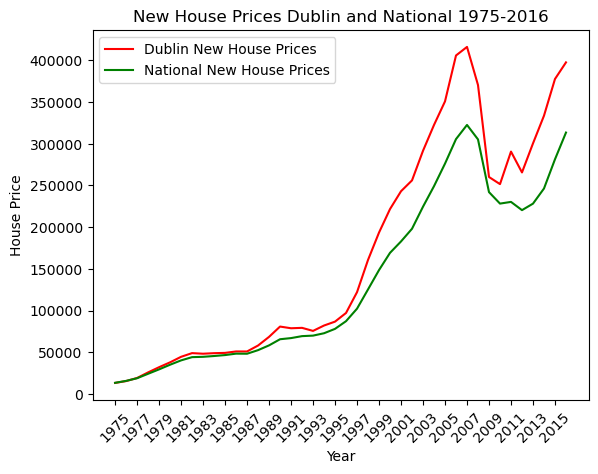

In [60]:
#plotting price of 2 new datasets
plt.plot(df_Dub_new['Year'], df_Dub_new['VALUE'], color='r', label='Dublin New House Prices')
plt.plot(df_Nat_new['Year'], df_Nat_new['VALUE'], color='g', label='National New House Prices')


plt.xlabel("Year")
plt.ylabel("House Price")
plt.title("New House Prices Dublin and National 1975-2016")


plt.legend()
plt.xticks(list(df_Dub_new['Year'].unique()[::2]), rotation=45)
plt.show()


In [62]:
#create 2 datasets for secondhand price analysis. One for Dublin and the second for National.
df_Dub_second = df[(df['Statistic Label'].str.contains("Second")) &  (df['Area']=="Dublin")].reset_index()
df_Nat_second = df[(df['Statistic Label'].str.contains("Second")) &  (df['Area']=="National")].reset_index()

In [63]:
df_Dub_second.head()

,index,Statistic Label,Year,Area,UNIT,VALUE
0,295,Second Hand House Prices,1975,Dublin,Euro,12774.0
1,302,Second Hand House Prices,1976,Dublin,Euro,15850.0
2,309,Second Hand House Prices,1977,Dublin,Euro,18778.0
3,316,Second Hand House Prices,1978,Dublin,Euro,22920.0
4,323,Second Hand House Prices,1979,Dublin,Euro,30092.0


In [64]:
df_Nat_second.head()

,index,Statistic Label,Year,Area,UNIT,VALUE
0,294,Second Hand House Prices,1975,National,Euro,12478.0
1,301,Second Hand House Prices,1976,National,Euro,15303.0
2,308,Second Hand House Prices,1977,National,Euro,17925.0
3,315,Second Hand House Prices,1978,National,Euro,21895.0
4,322,Second Hand House Prices,1979,National,Euro,27598.0


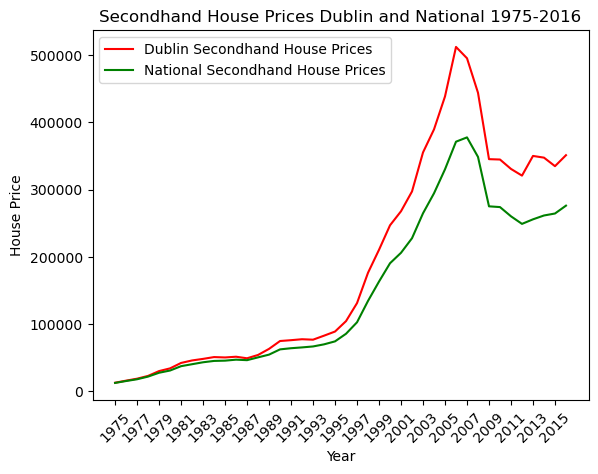

In [66]:
#plotting price of 2 new datasets
plt.plot(df_Dub_second['Year'], df_Dub_second['VALUE'], color='r', label='Dublin Secondhand House Prices')
plt.plot(df_Nat_second['Year'], df_Nat_second['VALUE'], color='g', label='National Secondhand House Prices')


plt.xlabel("Year")
plt.ylabel("House Price")
plt.title("Secondhand House Prices Dublin and National 1975-2016")
plt.xticks(list(df_Dub_second['Year'].unique()[::2]), rotation=45)

plt.legend()
plt.show()

In [67]:
# check new house price correlation
df_Dub_new['VALUE'].corr(df_Nat_new['VALUE'], method='pearson')

0.9957710223924618

In [68]:
# check secondhand price correlation
df_Dub_second['VALUE'].corr(df_Nat_second['VALUE'], method='pearson')

0.9989860995914884

In [69]:
#The graphs show that new and second hand house prices are strongly correlated.
#To measure the actual correlation we can use thePearson correlation measure. 
#This measures the strength of the linear relationship between two variables

In [81]:
#I will examine more data and plot it beside both of these graphs 
#importing csv file 'House Construction Cost Index'
df2 = pd.read_csv(r'C:\Users\killi\Downloads\HSA09.20221123T171128.csv')

In [82]:
#look at shape of dataframe 2 ('House Construction Cost Index')
df2.shape

(42, 5)

In [83]:
df2.head()

,STATISTIC Label,Year,State,UNIT,VALUE
0,House Construction Cost Index,1975,State,Base Jan 1991=100,20.0
1,House Construction Cost Index,1976,State,Base Jan 1991=100,22.9
2,House Construction Cost Index,1977,State,Base Jan 1991=100,26.9
3,House Construction Cost Index,1978,State,Base Jan 1991=100,29.6
4,House Construction Cost Index,1979,State,Base Jan 1991=100,34.2


In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  513 non-null    object 
 1   Month            513 non-null    object 
 2   State            513 non-null    object 
 3   UNIT             513 non-null    object 
 4   VALUE            513 non-null    float64
dtypes: float64(1), object(4)
memory usage: 20.2+ KB


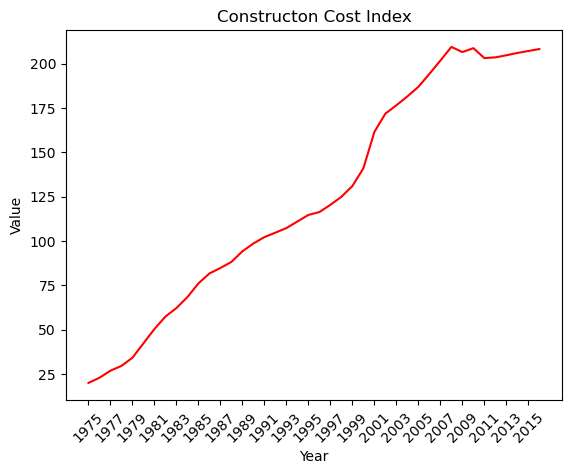

In [86]:
#plotting this
plt.plot(df2['Year'], df2['VALUE'], color='r')
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Constructon Cost Index")
plt.xticks(list(df2['Year'].unique()[::2]), rotation=45)

plt.show()

In [283]:
#going to scrape inflation data from internet
import requests
import time
from bs4 import BeautifulSoup

In [284]:
world_data = 'https://www.worlddata.info/europe/ireland/inflation-rates.php#:~:text=During%20the%20observation%20period%20from,year%20inflation%20rate%20was%208.2%25.'

In [285]:
page = requests.get(world_data)

In [286]:
soup = BeautifulSoup(page.text, 'lxml')

In [109]:
#i got the html, now I will get the table im looking for

In [287]:
table = soup.find('table', {'class' : "std100 hover"})

In [288]:
headers = []

In [289]:
for i in table.find_all('th'):
    title = i.text.strip()
    headers.append(title)


In [290]:
inflation = pd.DataFrame(columns = headers)

In [291]:
for row in table.find_all('tr')[1:]:
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]
    length = len(inflation)
    inflation.loc[length] = row_data
    

In [292]:
print(inflation)

    Year  Ireland    Ø EU   Ø USA Ø World
0   2021   2.36 %  2.55 %  4.70 %  3.42 %
1   2020  -0.33 %  0.50 %  1.23 %  1.92 %
2   2019   0.94 %  1.63 %  1.81 %  2.19 %
3   2018   0.49 %  1.74 %  2.44 %  2.44 %
4   2017   0.34 %  1.43 %  2.13 %  2.19 %
..   ...      ...     ...     ...     ...
57  1964   6.72 %  3.42 %  1.28 %     n/a
58  1963   2.45 %  2.92 %  1.24 %     n/a
59  1962   4.26 %  3.55 %  1.20 %     n/a
60  1961   2.76 %  2.08 %  1.07 %     n/a
61  1960   0.45 %  1.74 %  1.46 %     n/a

[62 rows x 5 columns]


In [293]:
inflation['Ireland'] = [x.strip('%') for x in inflation['Ireland']]

In [295]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     62 non-null     object
 1   Ireland  62 non-null     object
 2   Ø EU     62 non-null     object
 3   Ø USA    62 non-null     object
 4   Ø World  62 non-null     object
dtypes: object(5)
memory usage: 2.9+ KB


In [294]:
print(inflation)



    Year Ireland    Ø EU   Ø USA Ø World
0   2021   2.36   2.55 %  4.70 %  3.42 %
1   2020  -0.33   0.50 %  1.23 %  1.92 %
2   2019   0.94   1.63 %  1.81 %  2.19 %
3   2018   0.49   1.74 %  2.44 %  2.44 %
4   2017   0.34   1.43 %  2.13 %  2.19 %
..   ...     ...     ...     ...     ...
57  1964   6.72   3.42 %  1.28 %     n/a
58  1963   2.45   2.92 %  1.24 %     n/a
59  1962   4.26   3.55 %  1.20 %     n/a
60  1961   2.76   2.08 %  1.07 %     n/a
61  1960   0.45   1.74 %  1.46 %     n/a

[62 rows x 5 columns]


In [296]:
inflation = inflation[::-1]
print(inflation)

    Year Ireland    Ø EU   Ø USA Ø World
61  1960   0.45   1.74 %  1.46 %     n/a
60  1961   2.76   2.08 %  1.07 %     n/a
59  1962   4.26   3.55 %  1.20 %     n/a
58  1963   2.45   2.92 %  1.24 %     n/a
57  1964   6.72   3.42 %  1.28 %     n/a
..   ...     ...     ...     ...     ...
4   2017   0.34   1.43 %  2.13 %  2.19 %
3   2018   0.49   1.74 %  2.44 %  2.44 %
2   2019   0.94   1.63 %  1.81 %  2.19 %
1   2020  -0.33   0.50 %  1.23 %  1.92 %
0   2021   2.36   2.55 %  4.70 %  3.42 %

[62 rows x 5 columns]


In [298]:
inflation["Ireland"] = inflation.Ireland.astype(float)
inflation["Year"] = inflation.Year.astype(float)

In [299]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 61 to 0
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     62 non-null     float64
 1   Ireland  62 non-null     float64
 2   Ø EU     62 non-null     object 
 3   Ø USA    62 non-null     object 
 4   Ø World  62 non-null     object 
dtypes: float64(2), object(3)
memory usage: 2.9+ KB


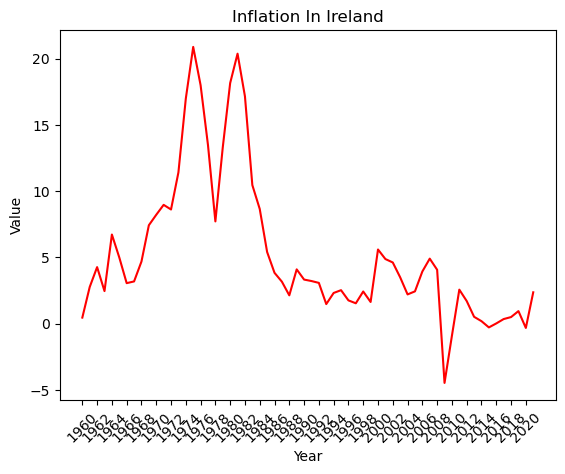

In [301]:
plt.plot(inflation['Year'], inflation['Ireland'], color='r')
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Inflation In Ireland")
plt.xticks(list(inflation['Year'].unique()[::2]), rotation=45)
plt.show()

In [306]:
#load in new dataset
df3 = pd.read_csv(r'C:\Users\killi\Downloads\EHA05.20221124T151105.csv')

In [323]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12544 entries, 0 to 12543
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Statistic Label             12544 non-null  object 
 1   Year                        12544 non-null  int64  
 2   Type of Employment          12544 non-null  object 
 3   NACE Rev 2 Economic Sector  12544 non-null  object 
 4   UNIT                        12544 non-null  object 
 5   VALUE                       7616 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 588.1+ KB


In [324]:
df3.head()

,Statistic Label,Year,Type of Employment,NACE Rev 2 Economic Sector,UNIT,VALUE
0,Average Regular Earnings,2008,All employment status,All NACE economic sectors,Euro,33622.0
1,Average Regular Earnings,2008,All employment status,Construction (F),Euro,36539.0
2,Average Regular Earnings,2008,All employment status,Wholesale and retail trade; repair of motor ve...,Euro,24758.0
3,Average Regular Earnings,2008,All employment status,Transportation and storage (H),Euro,35703.0
4,Average Regular Earnings,2008,All employment status,Accommodation and food service activities (I),Euro,17658.0


In [336]:
df3_data = df3[(df3['Statistic Label'].str.contains("Average Regular Earnings")) &  (df3['Type of Employment']=="Full-time") & (df3['NACE Rev 2 Economic Sector']=='All NACE economic sectors')].reset_index()

In [340]:
df3_data.head()

,index,Statistic Label,Year,Type of Employment,NACE Rev 2 Economic Sector,UNIT,VALUE
0,14,Average Regular Earnings,2008,Full-time,All NACE economic sectors,Euro,40252.0
1,70,Average Regular Earnings,2009,Full-time,All NACE economic sectors,Euro,41127.0
2,126,Average Regular Earnings,2010,Full-time,All NACE economic sectors,Euro,40937.0
3,182,Average Regular Earnings,2011,Full-time,All NACE economic sectors,Euro,40641.0
4,238,Average Regular Earnings,2012,Full-time,All NACE economic sectors,Euro,40995.0


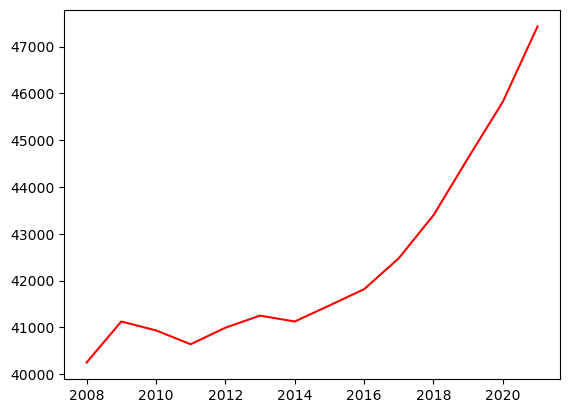

In [341]:
plt.plot(df3_data['Year'], df3_data['VALUE'], color='r')
plt.show()

In [392]:
#importing type of houses built data
df4 = pd.read_csv(r'C:\Users\killi\Downloads\NDA02.20221125T141130.csv')


In [393]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STATISTIC Label  44 non-null     object
 1   Year             44 non-null     int64 
 2   Type of House    44 non-null     object
 3   UNIT             44 non-null     object
 4   VALUE            44 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.8+ KB


In [394]:
df4.head()

,STATISTIC Label,Year,Type of House,UNIT,VALUE
0,New Dwelling Completions,2011,All house types,Number,6994
1,New Dwelling Completions,2011,Single house,Number,4814
2,New Dwelling Completions,2011,Scheme house,Number,1358
3,New Dwelling Completions,2011,Apartment,Number,822
4,New Dwelling Completions,2012,All house types,Number,4911


In [395]:
df4.shape

(44, 5)

In [396]:
print(df4.isnull().sum())

STATISTIC Label    0
Year               0
Type of House      0
UNIT               0
VALUE              0
dtype: int64


In [397]:
df4.set_index('Type of House', inplace=True)

In [398]:
df4 = df4.loc[['Single house', 'Scheme house']]

In [399]:
df4_all_houses = df4.drop('Scheme house')

In [400]:
df4_all_houses.head()

,STATISTIC Label,Year,UNIT,VALUE
Type of House,,,,
Single house,New Dwelling Completions,2011,Number,4814
Single house,New Dwelling Completions,2012,Number,3501
Single house,New Dwelling Completions,2013,Number,2947
Single house,New Dwelling Completions,2014,Number,2975
Single house,New Dwelling Completions,2015,Number,3252


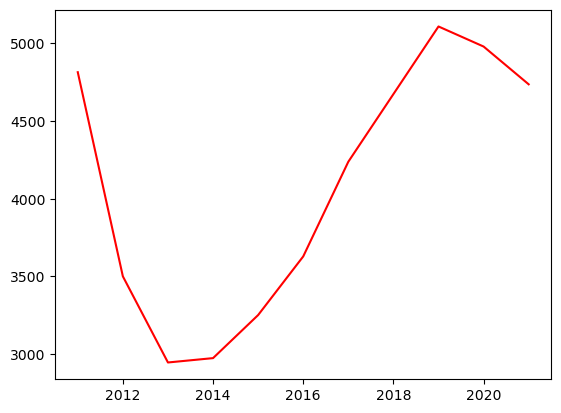

In [401]:
plt.plot(df4_all_houses['Year'], df4_all_houses['VALUE'], color='r')

In [402]:
df4_scheme_houses = df4_scheme_houses = df4.drop('Single house')

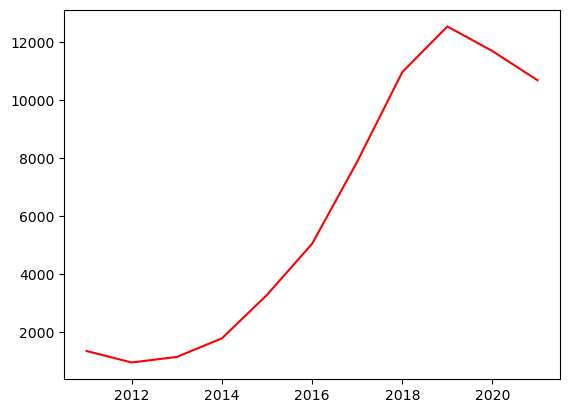

In [403]:
plt.plot(df4_scheme_houses['Year'], df4_scheme_houses['VALUE'], color='r')

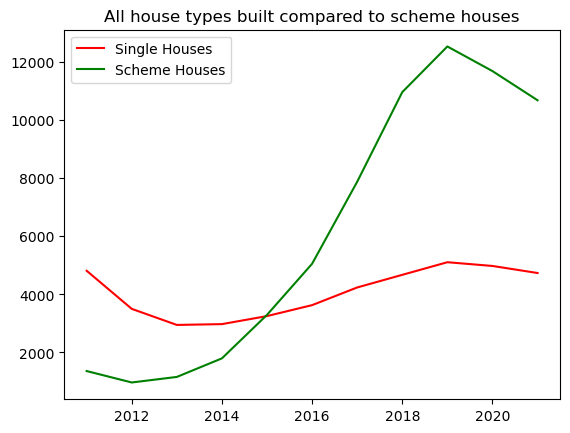

In [407]:
plt.plot(df4_all_houses['Year'], df4_all_houses['VALUE'], color='r', label='Single Houses')
plt.plot(df4_scheme_houses['Year'], df4_scheme_houses['VALUE'], color='g', label='Scheme Houses')
plt.title("All house types built compared to scheme houses")

plt.legend()
plt.show()

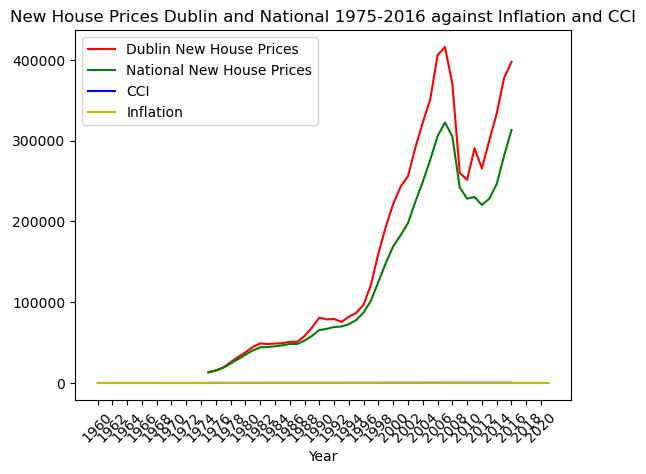

In [422]:
plt.plot(df_Dub_new['Year'], df_Dub_new['VALUE'], color='r', label='Dublin New House Prices')
plt.plot(df_Nat_new['Year'], df_Nat_new['VALUE'], color='g', label='National New House Prices')
plt.plot(df2['Year'], df2['VALUE'], color='b', label='CCI')
plt.plot(inflation['Year'], inflation['Ireland'], color='y', label='Inflation')

plt.xlabel("Year")
plt.legend()
plt.title("New House Prices Dublin and National 1975-2016 against Inflation and CCI")


plt.legend()
plt.xticks(list(inflation['Year'].unique()[::2]), rotation=45)
plt.show()


In [78]:
gdp_per_capita = pd.read_csv(r'C:\Users\killi\Downloads\ireland-gdp-per-capita.csv')

In [79]:
gdp_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     62 non-null     object 
 1    GDP Per Capita (US $)   62 non-null     float64
 2    Annual Growth Rate (%)  61 non-null     float64
 3                            0 non-null      float64
dtypes: float64(3), object(1)
memory usage: 2.1+ KB


In [80]:
gdp_per_capita.shape

(62, 4)

In [81]:
gdp_per_capita.head()

,date,GDP Per Capita (US $),Annual Growth Rate (%),
0,31/12/1960,685.6147,NaN,NaN
1,31/12/1961,739.2764,7.83,NaN
2,31/12/1962,797.0063,7.81,NaN
3,31/12/1963,852.1353,6.92,NaN
4,31/12/1964,965.1354,13.26,NaN


In [83]:
gdp_per_capita.get(' GDP Per Capita (US $)', default="no_country")

0       685.6147
1       739.2764
2       797.0063
3       852.1353
4       965.1354
         ...    
57    69774.0290
58    79107.6050
59    80886.6157
60    85422.5429
61    99152.1026
Name:  GDP Per Capita (US $), Length: 62, dtype: float64

In [84]:
#multiplied dollar by euro exchange rate
gdp_per_capita[' GDP Per Capita (US $)'] = gdp_per_capita[' GDP Per Capita (US $)'].mul(0.95)

In [85]:
gdp_per_capita['date'] = pd.to_datetime(gdp_per_capita['date'], format="%d/%m/%Y")

In [86]:
print(gdp_per_capita['date'])

0    1960-12-31
1    1961-12-31
2    1962-12-31
3    1963-12-31
4    1964-12-31
        ...    
57   2017-12-31
58   2018-12-31
59   2019-12-31
60   2020-12-31
61   2021-12-31
Name: date, Length: 62, dtype: datetime64[ns]


In [87]:
gdp_per_capita['date'] = gdp_per_capita['date'].dt.to_period('Y')

In [88]:
print(gdp_per_capita['date'])

0     1960
1     1961
2     1962
3     1963
4     1964
      ... 
57    2017
58    2018
59    2019
60    2020
61    2021
Name: date, Length: 62, dtype: period[A-DEC]


In [89]:
print(gdp_per_capita)

    date   GDP Per Capita (US $)   Annual Growth Rate (%)    
0   1960              651.333965                      NaN NaN
1   1961              702.312580                     7.83 NaN
2   1962              757.155985                     7.81 NaN
3   1963              809.528535                     6.92 NaN
4   1964              916.878630                    13.26 NaN
..   ...                     ...                      ...  ..
57  2017            66285.327550                    11.00 NaN
58  2018            75152.224750                    13.38 NaN
59  2019            76842.284915                     2.25 NaN
60  2020            81151.415755                     5.61 NaN
61  2021            94194.497470                    16.07 NaN

[62 rows x 4 columns]


In [90]:
gdp_per_capita.rename(columns = {' GDP Per Capita (US $)':'GDP'}, inplace = True)

In [100]:
gdp_per_capita["GDP"] = gdp_per_capita.GDP.astype(float)
gdp_per_capita["date"] = gdp_per_capita.date.astype(float)

In [92]:
print(gdp_per_capita['date'])

0     1960
1     1961
2     1962
3     1963
4     1964
      ... 
57    2017
58    2018
59    2019
60    2020
61    2021
Name: date, Length: 62, dtype: period[A-DEC]


Text(0.5, 1.0, 'GDP Per Capita 1960-2021')

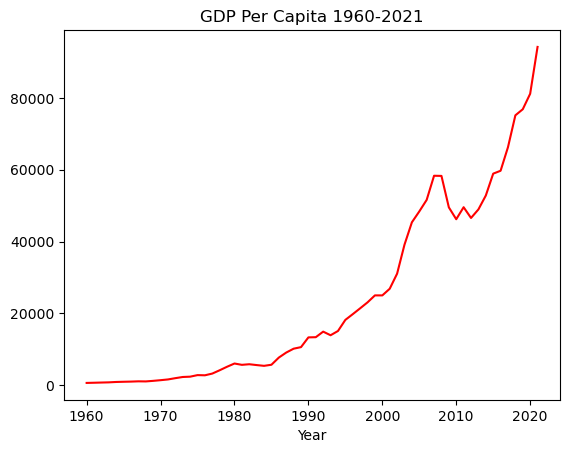

In [110]:
#plotting gdp per capita
plt.plot(gdp_per_capita['date'], gdp_per_capita['GDP'], color='r',)
plt.xlabel("Year")
plt.title("GDP Per Capita 1960-2021")
